In [177]:
import numpy as np
import pandas as pd

import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt
import mplcyberpunk
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from imblearn.over_sampling import RandomOverSampler

In [178]:
df = pd.read_csv('/content/Marriage_Divorce_DB.csv', usecols=['Age Gap', 
'Divorce Probability'])

df.sort_values(by=['Divorce Probability'], inplace=True)

df.dropna(subset=['Age Gap', 
'Divorce Probability'])

df = df.rename(columns = {'Divorce Probability':'DP'})
df = df.rename(columns = {'Age Gap':'AG'})

In [179]:
df.loc[df.DP>1.5,'Outcome']=1
df.loc[df.DP<=1.5, 'Outcome']=0

In [180]:
print("likely to stay engaged: {}".format(len(df[df['Outcome'] == 0]))) #prints num of neg- patients
print("not likely to stay engaged: {}".format(len(df[df['Outcome'] == 1])))

likely to stay engaged: 21
not likely to stay engaged: 79


In [184]:
x = df[df.columns[:-1]].values
y = df[df.columns[-1]].values

In [186]:
scalar = StandardScaler()

x = scalar.fit_transform(x)

In [188]:
over = RandomOverSampler()
x, y = over.fit_resample(x,y)
data = np.hstack((x, np.reshape(y, (-1, 1))))
transformed_df = pd.DataFrame(data, columns=df.columns)

In [189]:
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.4, random_state = 0)
x_valid, x_test, y_valid, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=0)

In [223]:
model = tf.keras.Sequential([
                              tf.keras.layers.Dense(32, activation='relu'), 
                              tf.keras.layers.Dense(32, activation='relu6'),
                              tf.keras.layers.Dense(32, activation='tanh'),
                              tf.keras.layers.Dense(1, activation="sigmoid")
])

In [224]:
model.compile(
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy']
)

In [225]:
model.evaluate(x, y)
model.evaluate(x_train, y_train)
model.evaluate(x_valid, y_valid)


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1/1 [==============================] - 0s 24ms/step - loss: 0.6408 - accuracy: 0.8750


[0.6408126354217529, 0.875]

In [226]:
history = model.fit(x_train, y_train, batch_size=16, epochs=20, validation_data=(x_valid, y_valid))

Epoch 1/20
6/6 [==============================] - 1s 17ms/step - loss: 0.6113 - accuracy: 0.8723 - val_loss: 0.5813 - val_accuracy: 0.9062
Epoch 2/20
6/6 [==============================] - 0s 12ms/step - loss: 0.5544 - accuracy: 0.8723 - val_loss: 0.5265 - val_accuracy: 0.9062
Epoch 3/20
6/6 [==============================] - 0s 8ms/step - loss: 0.4978 - accuracy: 0.8617 - val_loss: 0.4694 - val_accuracy: 0.9062
Epoch 4/20
6/6 [==============================] - 0s 9ms/step - loss: 0.4469 - accuracy: 0.8617 - val_loss: 0.4114 - val_accuracy: 0.9062
Epoch 5/20
6/6 [==============================] - 0s 11ms/step - loss: 0.3977 - accuracy: 0.8723 - val_loss: 0.3583 - val_accuracy: 0.9062
Epoch 6/20
6/6 [==============================] - 0s 9ms/step - loss: 0.3506 - accuracy: 0.8723 - val_loss: 0.3117 - val_accuracy: 0.9062
Epoch 7/20
6/6 [==============================] - 0s 10ms/step - loss: 0.3130 - accuracy: 0.8723 - val_loss: 0.2712 - val_accuracy: 0.9062
Epoch 8/20
6/6 [==============

In [227]:
model.evaluate(x_test, y_test)

1/1 [==============================] - 0s 28ms/step - loss: 0.1624 - accuracy: 0.9375


[0.1624007523059845, 0.9375]

In [228]:
acc = history.history['accuracy']
loss = history.history['loss']

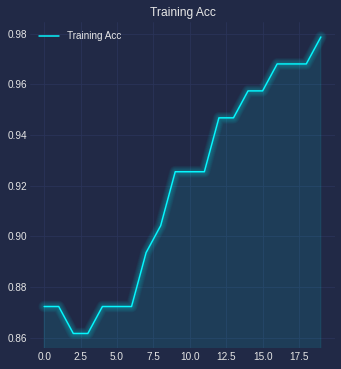

In [229]:
plt.figure(figsize=(12, 6))
plt.style.use('cyberpunk')
plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Acc')
plt.title('Training Acc')
plt.legend()
mplcyberpunk.add_glow_effects()

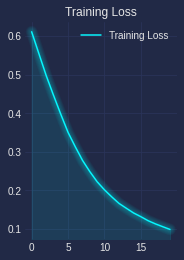

In [230]:
plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.title('Training Loss')
plt.legend()
mplcyberpunk.add_glow_effects()
plt.show()